In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_gaussian_quantiles
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier

In [2]:
# 生成假數據
x, y = make_gaussian_quantiles(cov=2.0, n_samples=500, n_features=2, n_classes=2, random_state=1)

# 一共有500筆資料，每筆資料有兩個特徵值
print(x.shape, y.shape)

(500, 2) (500,)


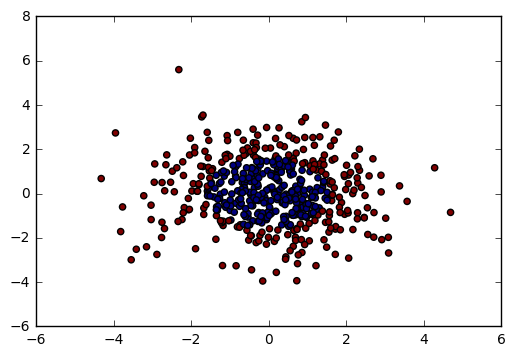

In [3]:
# 視覺化查看生成數據
# 可以發現數據明顯分為兩類(內圈與外圍)
plt.scatter(x[:,0], x[:,1], marker='o', c=y)
plt.show()

In [4]:
#分割數據(訓練集佔80%, 測試集佔20%)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2, shuffle=True)
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(400, 2) (100, 2)
(400,) (100,)


In [5]:
#建立決策樹模型
decision_tree_cls = DecisionTreeClassifier(criterion='entropy', max_depth=3,
                                           min_samples_split=10, min_samples_leaf=5)

#使用決策樹模型進行訓練
decision_tree_cls.fit(x_train, y_train)

#以訓練好的決策樹進行預測
y_pred = decision_tree_cls.predict(x_test)

In [11]:
# 計算決策樹的準確度
def cal_acc(y_true, y_pred):
    
    return sum(y_true == y_pred) / len(y_test)

#print(f"Accuracy: {cal_acc(y_test, y_pred)}")
print ("Accuracy: {}".format(cal_acc(y_test, y_pred)))

Accuracy: 0.86


In [13]:
# 也可以使用DecisionTreeClassifier內建的方法來計算準確度
#print(f"Accuracy: {decision_tree_cls.score(x_test,y_test)}")
print ("Accuracy: {}".format(decision_tree_cls.score(x_test,y_test)))

# 查看決策樹深度與終端節點個數
#print(f"Depth: {decision_tree_cls.get_depth()}, Number of leaves: {decision_tree_cls.get_n_leaves()}")
print ("Depth: {}, Number of leaves: {}".format(decision_tree_cls.get_depth(),decision_tree_cls.get_n_leaves()))

Accuracy: 0.86
Depth: 3, Number of leaves: 5


In [14]:
# 先前的課程中提到，我們可以透過feature被使用來分割的次數得知feature的重要程度
# 我們可以透過feature_importance_來得到重要程度的值，且所有feature的重要程度合為1

print("Importance:")
# print(f"feature_1: {decision_tree_cls.feature_importances_[0]}")
# print(f"feature_2: {decision_tree_cls.feature_importances_[1]}")
# print(f"Total: {decision_tree_cls.feature_importances_[0] + decision_tree_cls.feature_importances_[1]}")

print ("feature_1: {}".format(decision_tree_cls.feature_importances_[0]))
print ("feature_2: {}".format(decision_tree_cls.feature_importances_[1]))
print ("Total: {}".format(decision_tree_cls.feature_importances_[0] + decision_tree_cls.feature_importances_[1]))

Importance:
feature_1: 0.3415865276600187
feature_2: 0.6584134723399814
Total: 1.0


C:\Users\Fabienne\Anaconda3\lib\site-packages\numpy\ma\core.py:6554: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
C:\Users\Fabienne\Anaconda3\lib\site-packages\numpy\ma\core.py:6554: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


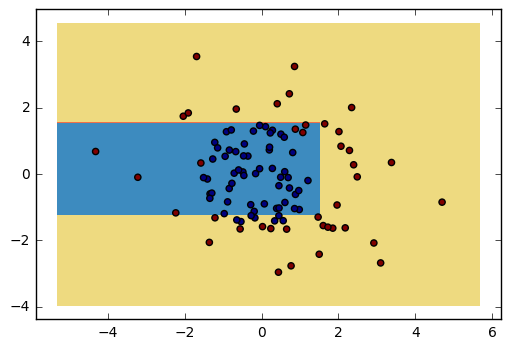

In [18]:
#視覺化分類結果
x_min, x_max = x_test[:, 0].min() - 1, x_test[:, 0].max() + 1
y_min, y_max = x_test[:, 1].min() - 1, x_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

z = decision_tree_cls.predict(np.concatenate((xx.ravel().reshape(-1,1), yy.ravel().reshape(-1,1)), axis=1))
z = z.reshape(xx.shape)

cs = plt.contourf(xx, yy, z, cmap=plt.cm.Paired)
plt.scatter(x_test[:, 0], x_test[:, 1], marker='o', c=y_test)
plt.show()

#可以發現在藍色決策邊界內，有存在幾個紅色的類別樣本，那些樣本及模型分類錯誤的樣本

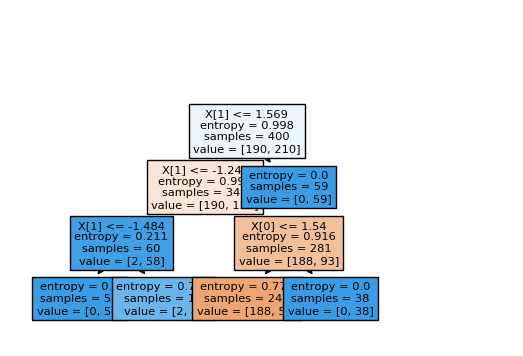

In [31]:
# 透過sklearn.tree.plot_tree，可以視覺化決策樹決策過程
plot_tree(decision_tree_cls, filled=True)
plt.show()

In [26]:
#建立隨機森林模型
forest_cls = RandomForestClassifier(n_estimators=50, criterion='entropy', max_depth=3,
                                           min_samples_split=10, min_samples_leaf=5)

#使用隨機森林模型進行訓練
forest_cls.fit(x_train, y_train)

#以訓練好的隨機森林進行預測
y_pred = forest_cls.predict(x_test)

In [28]:
# 計算準確度
#print(f"Accuracy: {forest_cls.score(x_test,y_test)}")
print ("Accuracy: {}".format(forest_cls.score(x_test,y_test)))

# 查看隨機森林含的決策樹個數
#print(f"Number of trees: {len(forest_cls.estimators_)}")
print ("Number of trees: {}".format(len(forest_cls.estimators_)))

Accuracy: 0.94
Number of trees: 50


In [29]:
# 透過feature_importance_來得到重要程度的值，且所有feature的重要程度合為1

print("Importance:")
# print(f"feature_1: {forest_cls.feature_importances_[0]}")
# print(f"feature_2: {forest_cls.feature_importances_[1]}")
# print(f"Total: {forest_cls.feature_importances_[0] + forest_cls.feature_importances_[1]}")

print ("feature_1: {}".format(forest_cls.feature_importances_[0]))
print ("feature_2: {}".format(forest_cls.feature_importances_[1]))
print ("Total: {}".format(forest_cls.feature_importances_[0] + forest_cls.feature_importances_[1]))

Importance:
feature_1: 0.4919205682113108
feature_2: 0.5080794317886892
Total: 1.0


C:\Users\Fabienne\Anaconda3\lib\site-packages\numpy\ma\core.py:6554: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
C:\Users\Fabienne\Anaconda3\lib\site-packages\numpy\ma\core.py:6554: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


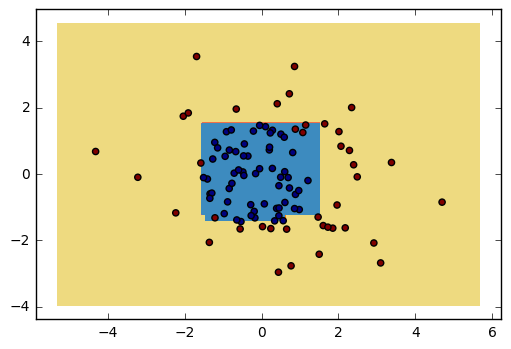

In [33]:
#視覺化分類結果
x_min, x_max = x_test[:, 0].min() - 1, x_test[:, 0].max() + 1
y_min, y_max = x_test[:, 1].min() - 1, x_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

z = forest_cls.predict(np.concatenate((xx.ravel().reshape(-1,1), yy.ravel().reshape(-1,1)), axis=1))
z = z.reshape(xx.shape)

cs = plt.contourf(xx, yy, z, cmap=plt.cm.Paired)
plt.scatter(x_test[:, 0], x_test[:, 1], marker='o', c=y_test)
plt.show()

#可以發現在藍色決策邊界內，有存在幾個紅色的類別樣本，那些樣本及模型分類錯誤的樣本

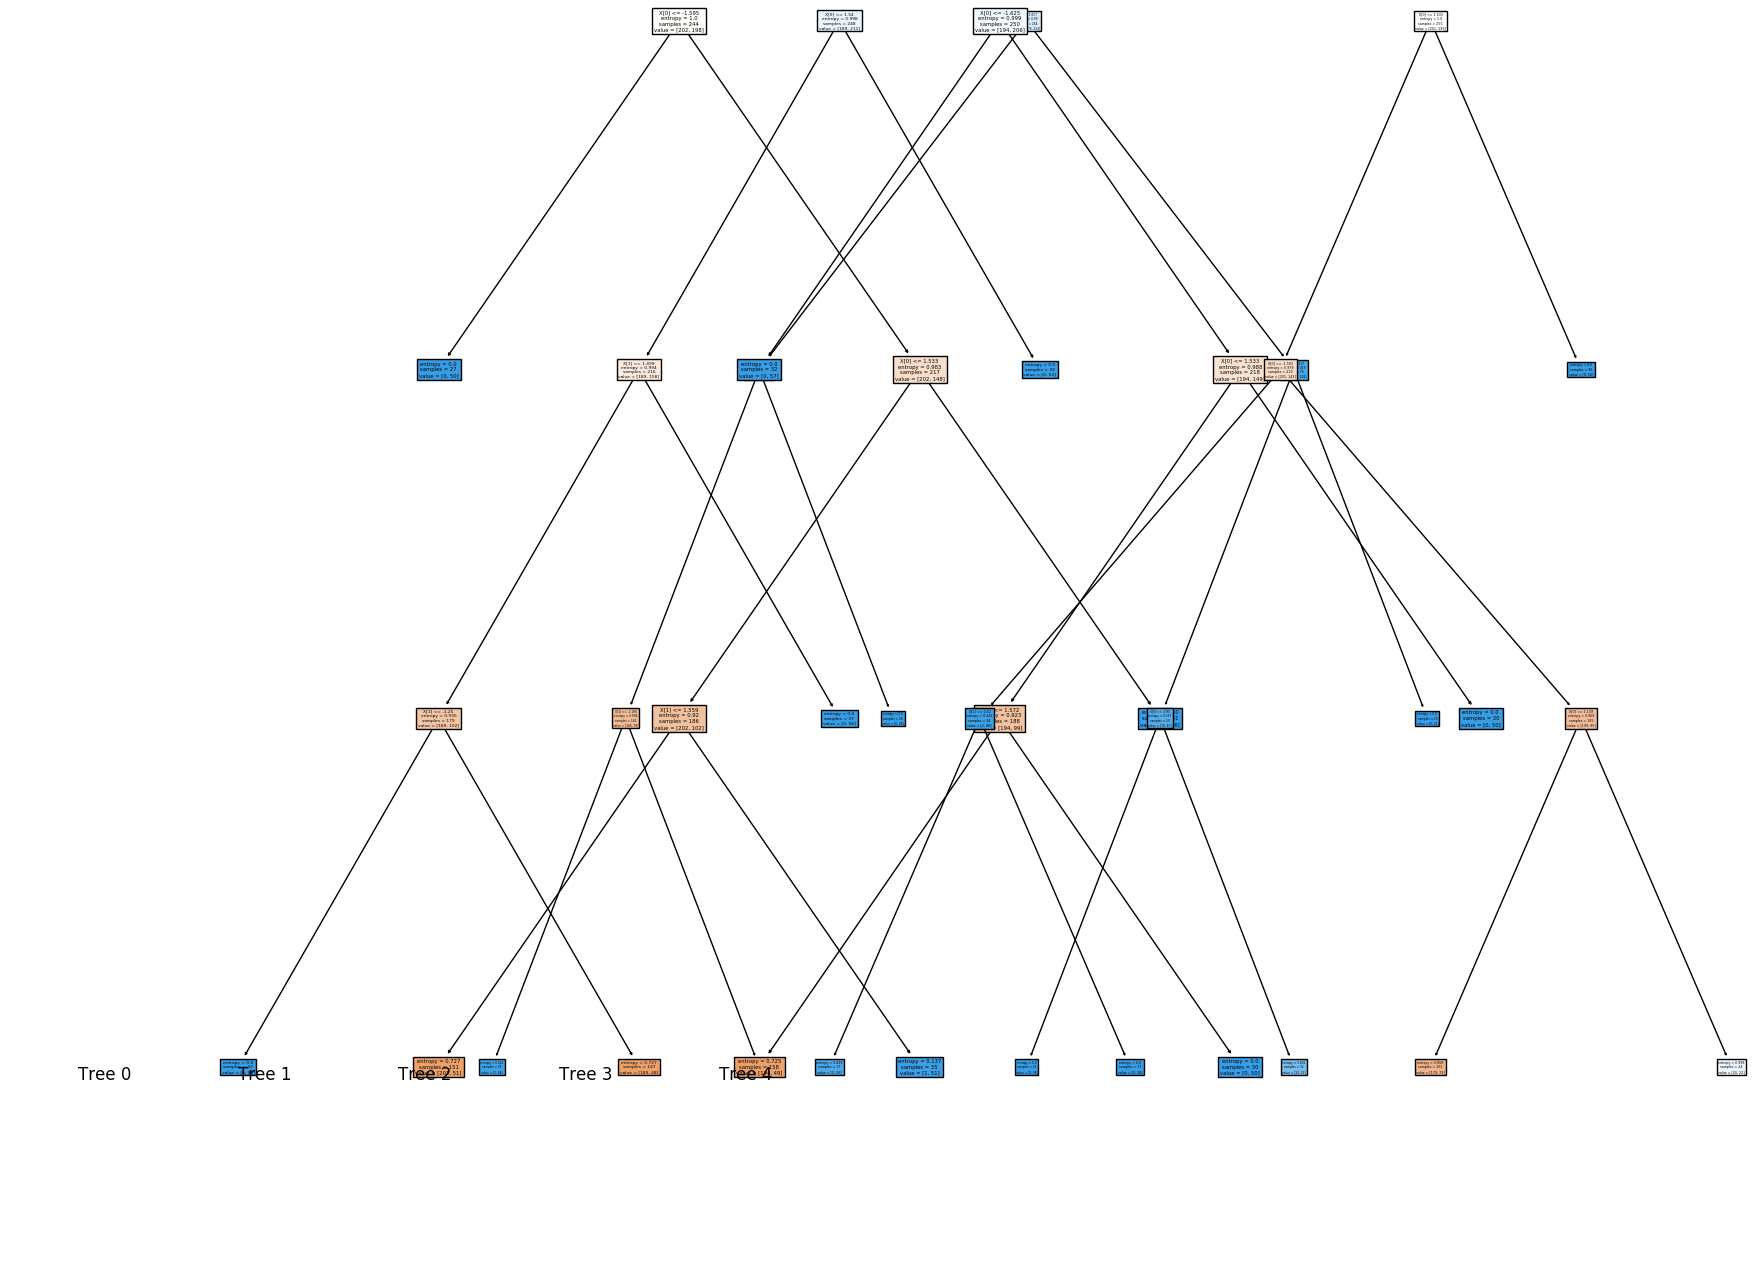

In [60]:
# 視覺化前五棵樹
fig, axes = plt.subplots(nrows = 1,ncols = 5,figsize = (10,2), dpi=900)

for i, tree in enumerate(forest_cls.estimators_[:5]):
    plot_tree(tree, filled=True, ax = axes[i])
    axes[i].set_title("Tree {}".format(i))
plt.show()

In [54]:
#建立adaboost模型
adaboost_cls = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                                        max_depth=3,
                                                                        min_samples_split=10,
                                                                        min_samples_leaf=5),
                                  n_estimators=50,
                                  learning_rate=0.8)

#使用adaboost模型進行訓練
adaboost_cls.fit(x_train, y_train)

#以訓練好的adaboost進行預測
y_pred = adaboost_cls.predict(x_test)

In [55]:
# 計算準確度
print("Accuracy: {}".format(adaboost_cls.score(x_test,y_test)))

# 查看adaboost含的分類器個數
print("Number of trees: {}".format(len(adaboost_cls.estimators_)))

Accuracy: 0.98
Number of trees: 50


In [56]:
# 計算adaboost每個子分類器的準確度
list(adaboost_cls.staged_score(x_test,y_test))

[0.86,
 0.92,
 0.9,
 0.99,
 0.99,
 0.97,
 0.94,
 0.94,
 0.94,
 0.92,
 0.92,
 0.96,
 0.97,
 0.97,
 0.97,
 0.96,
 0.96,
 0.96,
 0.96,
 0.98,
 0.98,
 0.98,
 0.96,
 0.96,
 0.96,
 0.97,
 0.96,
 0.96,
 0.97,
 0.98,
 0.98,
 0.97,
 0.97,
 0.97,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98,
 0.98]

In [58]:
# 透過feature_importance_來得到重要程度的值，且所有feature的重要程度合為1

print("Importance:")

print ("feature_1: {}".format(adaboost_cls.feature_importances_[0]))
print ("feature_2: {}".format(adaboost_cls.feature_importances_[1]))
print ("Total: {}".format(adaboost_cls.feature_importances_[0] + adaboost_cls.feature_importances_[1]))

Importance:
feature_1: 0.5183299628966531
feature_2: 0.48167003710334666
Total: 0.9999999999999998


C:\Users\Fabienne\Anaconda3\lib\site-packages\numpy\ma\core.py:6554: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
C:\Users\Fabienne\Anaconda3\lib\site-packages\numpy\ma\core.py:6554: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


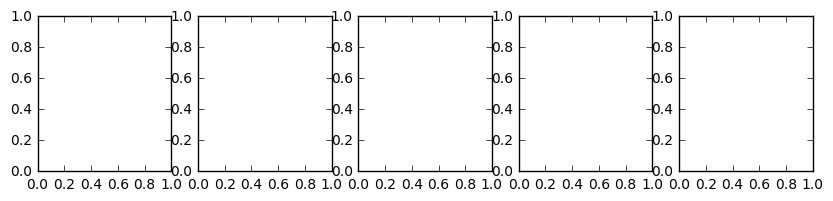

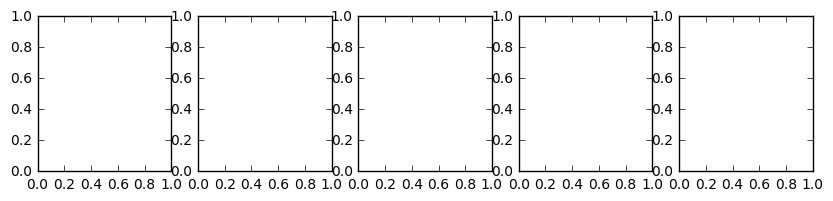

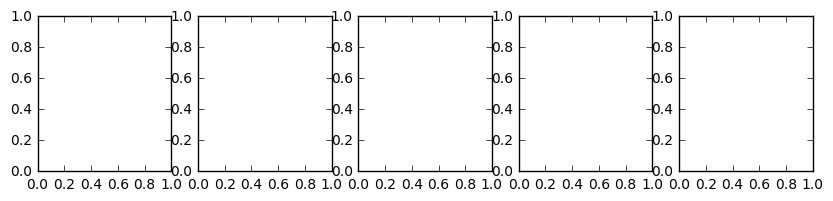

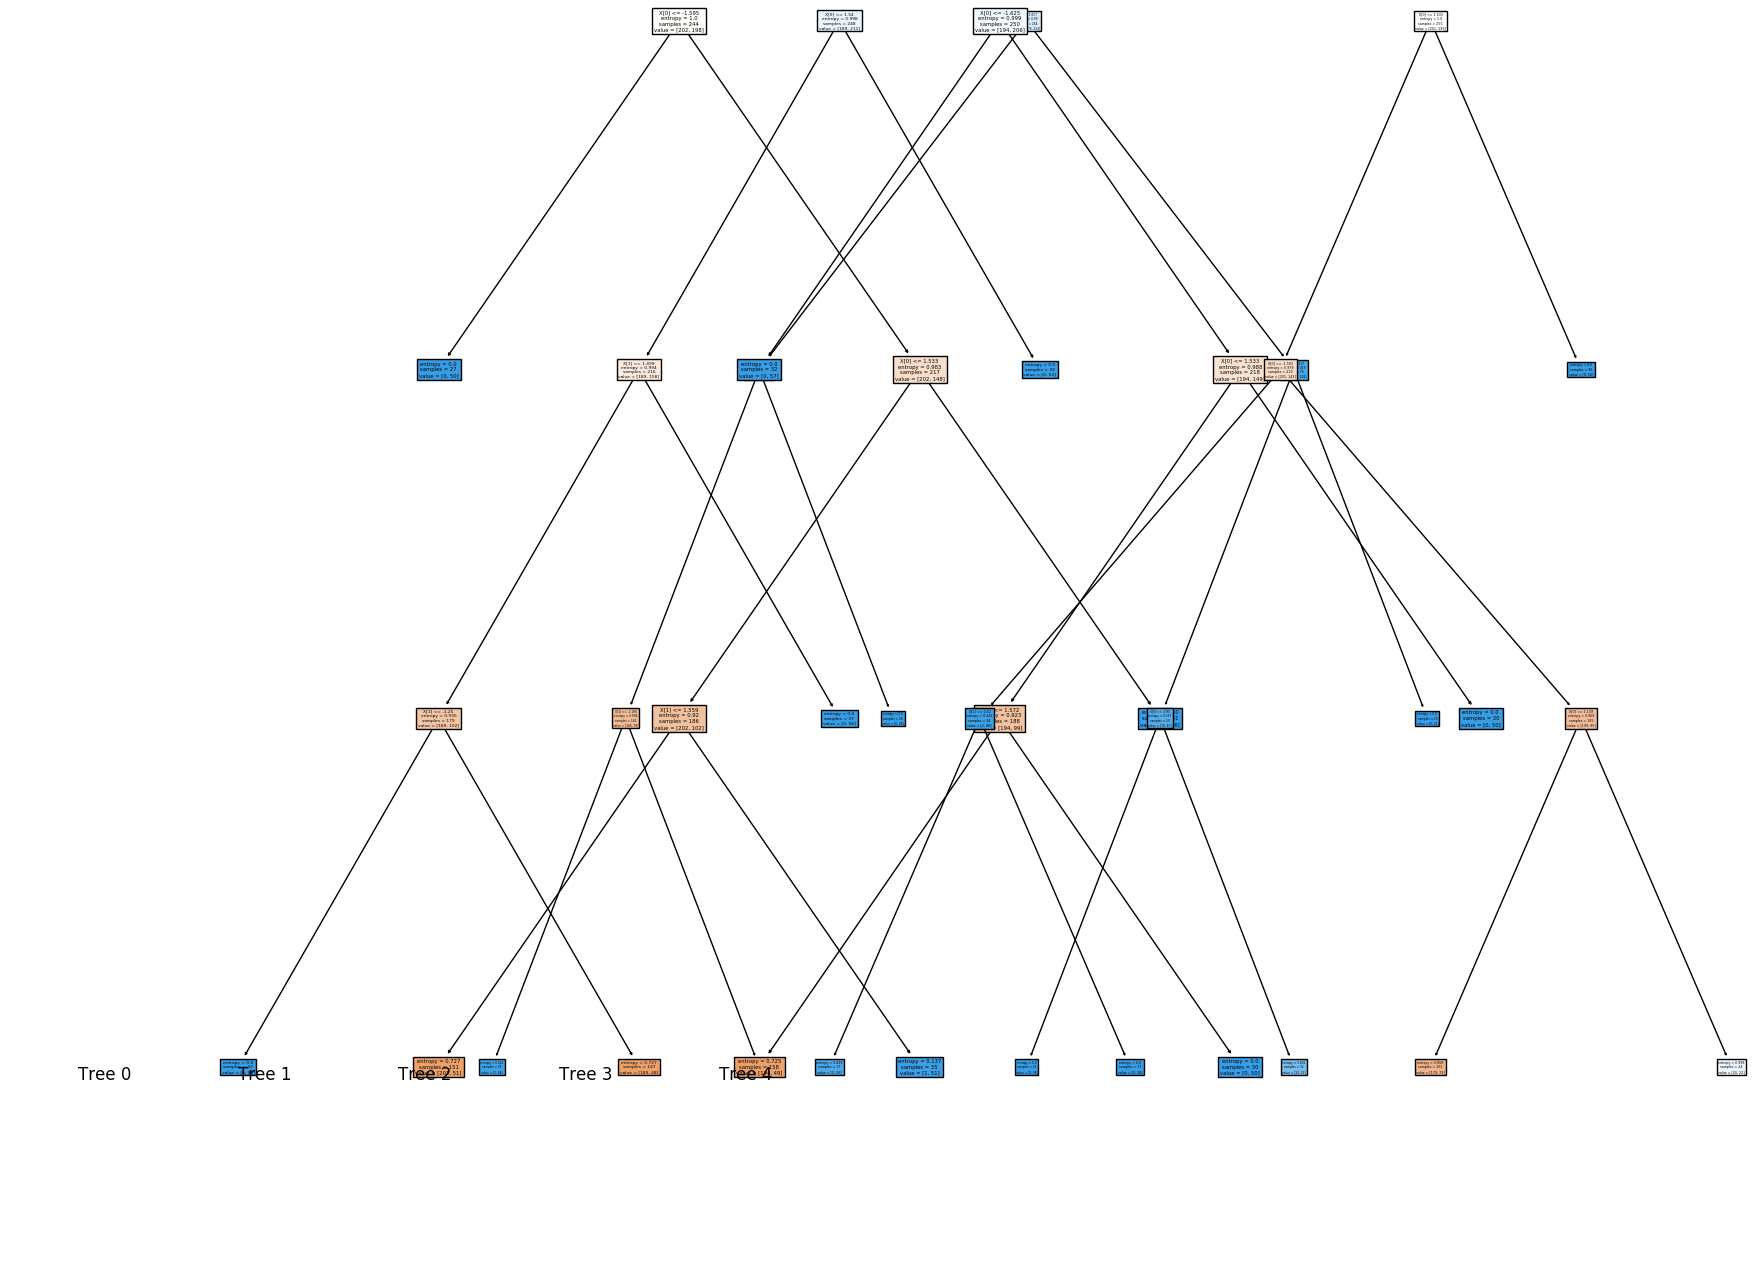

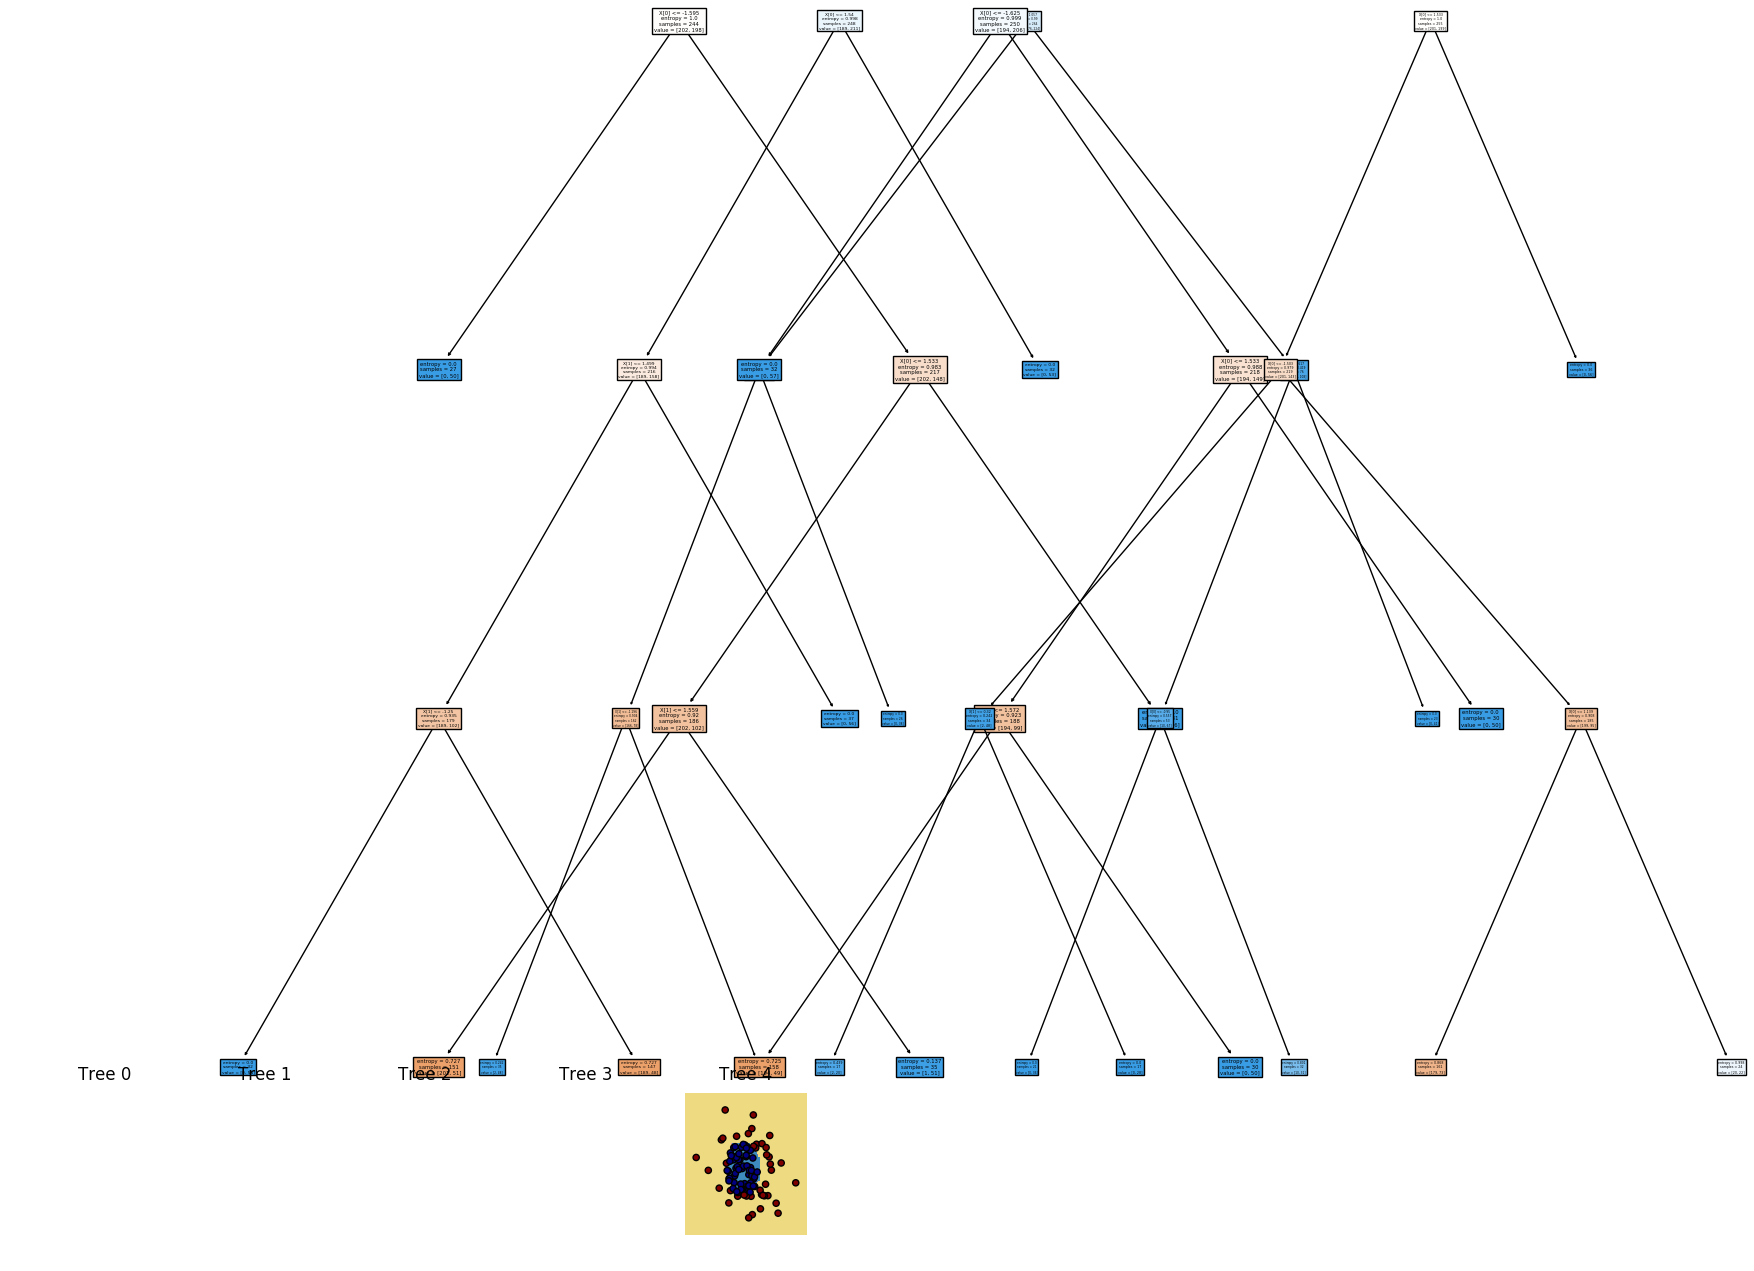

In [59]:
#視覺化分類結果
x_min, x_max = x_test[:, 0].min() - 1, x_test[:, 0].max() + 1
y_min, y_max = x_test[:, 1].min() - 1, x_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

z = adaboost_cls.predict(np.concatenate((xx.ravel().reshape(-1,1), yy.ravel().reshape(-1,1)), axis=1))
z = z.reshape(xx.shape)

cs = plt.contourf(xx, yy, z, cmap=plt.cm.Paired)
plt.scatter(x_test[:, 0], x_test[:, 1], marker='o', c=y_test)
plt.show()

#可以發現在藍色決策邊界內，有存在幾個黃色的類別樣本，那些樣本及模型分類錯誤的樣本